### Dependencies

In [3]:
import pandas as pd
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

### Loading & Cleaning Data

In [4]:
modelb = pd.read_csv('data/100k.csv')

In [5]:
#modelb = modelb.astype(float)

In [6]:
modelb = modelb.pivot_table(index = ['userId'], columns='titles', values = 'rating')

In [7]:
modelb = modelb.reset_index()
modelb.head(10)

titles,userId,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for column in modelb:
    modelb[column].fillna((modelb[column].mean()), inplace=True)
    
#modelb = modelb.fillna(2.5)
modelb.head(10)

titles,userId,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
0,1,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
1,2,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
2,3,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
3,4,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
4,5,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
5,6,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
6,7,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,2.000000
7,8,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
8,9,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
9,10,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074


In [9]:
modelb = modelb.drop(columns=['userId'])

In [10]:
modelb.head(15)

titles,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
0,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
1,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
2,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
3,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
4,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
5,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
6,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,2.000000
7,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
8,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
9,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074


### Building Machine Learning Model

In [11]:
test, train = np.split(modelb, [int(.2*len(modelb))])
train.head(10)

titles,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
140,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
141,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
142,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
143,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,1.000000,2.931818,2.75,3.074074
144,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
145,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
146,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,4.000000,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
147,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
148,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
149,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074


#### DO NOT RUN CELL BELOW UNLESS YOU HAVE SOME TIME, TAKES AROUND 1 HOUR TO RUN

In [ ]:

#kmeans = KMeans(n_clusters=18, random_state=0).fit(modelb)

Nc = range(1, 750)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = []

for i in range(len(kmeans)):
    score.append(kmeans[i].fit(modelb).score(modelb))
    print("Running cluster #:",i)

Running cluster #: 0
Running cluster #: 1
Running cluster #: 2
Running cluster #: 3
Running cluster #: 4
Running cluster #: 5
Running cluster #: 6
Running cluster #: 7
Running cluster #: 8
Running cluster #: 9
Running cluster #: 10
Running cluster #: 11
Running cluster #: 12
Running cluster #: 13
Running cluster #: 14
Running cluster #: 15
Running cluster #: 16
Running cluster #: 17
Running cluster #: 18
Running cluster #: 19
Running cluster #: 20
Running cluster #: 21
Running cluster #: 22
Running cluster #: 23
Running cluster #: 24
Running cluster #: 25
Running cluster #: 26
Running cluster #: 27
Running cluster #: 28
Running cluster #: 29
Running cluster #: 30
Running cluster #: 31
Running cluster #: 32
Running cluster #: 33
Running cluster #: 34
Running cluster #: 35
Running cluster #: 36
Running cluster #: 37
Running cluster #: 38
Running cluster #: 39
Running cluster #: 40
Running cluster #: 41
Running cluster #: 42
Running cluster #: 43
Running cluster #: 44
Running cluster #: 4

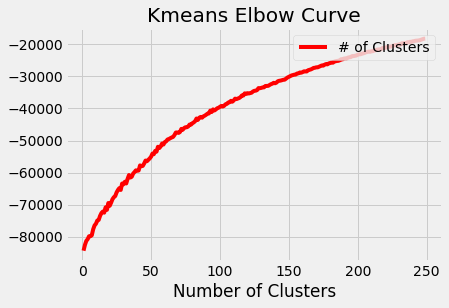

In [12]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')


plt.plot(Nc, score, 'r-')

plt.legend(['# of Clusters','Accuracy'], loc = 'upper right')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Kmeans Elbow Curve')

plt.show()

### Setting Number of Clusters

In [111]:
#not sure why I would have the random state. Ask Dr. Paul about that
#kmeans = KMeans(n_clusters=18).fit(modelb)
kmeans = KMeans(n_clusters=18, random_state=0).fit(modelb)

In [112]:
modelsize = len(modelb.columns)
modelsize

8225

### Creating a Fake User with Fake Ratings

In [113]:
#creates a fake user with random ratings
userratings = np.random.randint(low = 0, high = 5, size=modelsize)
userratings = [userratings]
userratings

[array([4, 1, 0, ..., 1, 2, 1])]

In [114]:
#predict's what cluster our fake user is in
userscluster = kmeans.predict(userratings)
userscluster = userscluster[0]
userscluster

5

In [115]:
prediction = kmeans.cluster_centers_[userscluster]
prediction

array([3.        , 2.5       , 3.5       , ..., 2.93181818, 2.75      ,
       3.07407407])

In [116]:
sort_index = np.argsort(prediction)
top20 = sort_index[-21:-1]
top20

array([7724, 7551, 4530, 4185, 7711, 4222, 2356, 4328, 7649, 7648, 4534,
       2296, 4378, 2281, 7618, 4448,  372, 7592,  400, 2292])

In [117]:
movietitles = modelb.columns
movietitles

Index(['"Great Performances" Cats (1998)',
       ''Hellboy': The Seeds of Creation (2004)',
       ''Neath the Arizona Skies (1934)', ''Round Midnight (1986)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       ''night Mother (1986)', '(500) Days of Summer (2009)',
       '(Untitled) (2009)', '*batteries not included (1987)',
       ...
       'Zombieland (2009)', 'Zookeeper (2011)', 'Zoolander (2001)',
       'Zorro, the Gay Blade (1981)', 'Zulu (1964)', 'Zus & Zo (2001)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)'],
      dtype='object', name='titles', length=8225)

### Fake User's Top 20 Recomendations

In [118]:
for i in top20:
    print(movietitles[i])

Valdez Is Coming (1971)
Trou, Le (Hole, The) (Night Watch, The) (1960)
M*A*S*H (a.k.a. MASH) (1970)
Last Emperor, The (1987)
Upstream Color (2013)
Laura (1944)
Equus (1977)
Limbo (1999)
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)
Umberto D. (1952)
Mac and Me (1988)
Elementary Particles, The (Elementarteilchen) (2006)
Live Forever (2003)
Effect of Gamma Rays on Man-in-the-Moon Marigolds, The (1972)
Two Escobars, The (2010)
Lorenzo's Oil (1992)
American: The Bill Hicks Story (2009)
Tuvalu (1999)
And Then There Were None (1945)
Electric Dreams (1984)


### Saving The Model Using Pickle

In [119]:
with open('flask-app/kmeans.pkl', 'wb') as fid:
    pickle.dump(kmeans, fid,2)  

In [120]:
#Save a dictionary of the index keys to make the dummy variables out of user input

#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column
cat = modelb

index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('flask-app/cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2) 

### Saving the Title & Average of Every Movie

In [121]:
movies = list(zip())

for column in modelb:
    i = {'title':column, 'average':modelb[column].mean()}
    movies.append(dict(i))

In [122]:
movies[0:10]

[{'average': 3.0, 'title': '"Great Performances" Cats (1998)'},
 {'average': 2.5, 'title': "'Hellboy': The Seeds of Creation (2004)"},
 {'average': 3.5, 'title': "'Neath the Arizona Skies (1934)"},
 {'average': 4.0, 'title': "'Round Midnight (1986)"},
 {'average': 2.3333333333333144, 'title': "'Til There Was You (1997)"},
 {'average': 3.25, 'title': "'burbs, The (1989)"},
 {'average': 4.666666666666629, 'title': "'night Mother (1986)"},
 {'average': 3.846153846153821, 'title': '(500) Days of Summer (2009)'},
 {'average': 4.0, 'title': '(Untitled) (2009)'},
 {'average': 3.41666666666667, 'title': '*batteries not included (1987)'}]

In [123]:
with open('flask-app/movies', 'wb') as fid:
    pickle.dump(movies, fid,2) 

In [134]:
len(movies)

8225

In [132]:
movies

[{'average': 3.0, 'title': '"Great Performances" Cats (1998)'},
 {'average': 2.5, 'title': "'Hellboy': The Seeds of Creation (2004)"},
 {'average': 3.5, 'title': "'Neath the Arizona Skies (1934)"},
 {'average': 4.0, 'title': "'Round Midnight (1986)"},
 {'average': 2.3333333333333144, 'title': "'Til There Was You (1997)"},
 {'average': 3.25, 'title': "'burbs, The (1989)"},
 {'average': 4.666666666666629, 'title': "'night Mother (1986)"},
 {'average': 3.846153846153821, 'title': '(500) Days of Summer (2009)'},
 {'average': 4.0, 'title': '(Untitled) (2009)'},
 {'average': 3.41666666666667, 'title': '*batteries not included (1987)'},
 {'average': 4.0, 'title': '...And Justice for All (1979)'},
 {'average': 3.5, 'title': '1-900 (06) (1994)'},
 {'average': 3.0, 'title': '10 (1979)'},
 {'average': 3.5, 'title': '10 Items or Less (2006)'},
 {'average': 3.25, 'title': '10 Things I Hate About You (1999)'},
 {'average': 2.0, 'title': '10 Years (2011)'},
 {'average': 2.777777777777813, 'title': '1

In [127]:
modelb = modelb.reset_index(drop=True)
modelb.head(5)

titles,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
0,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
1,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
2,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
3,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
4,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074


In [131]:
modelb = modelb.iloc[3:]
modelb

titles,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
7,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
8,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
9,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
10,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,5.000000,...,3.729167,3.0,3.078125,2.0,4.125,3.5,5.000000,2.931818,2.75,3.074074
11,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
12,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
13,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
14,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
15,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074
16,3.0,2.5,3.5,4.0,2.333333,3.25,4.666667,3.846154,4.0,3.416667,...,3.729167,3.0,3.078125,2.0,4.125,3.5,3.442857,2.931818,2.75,3.074074


In [95]:
blah_dict = dict(zip(modelb.columns,modelb.columns.mean()))

AttributeError: 'Index' object has no attribute 'mean'

In [ ]:
#index_dict

In [138]:
movies

[{'average': 3.0, 'title': '"Great Performances" Cats (1998)'},
 {'average': 2.5, 'title': "'Hellboy': The Seeds of Creation (2004)"},
 {'average': 3.5, 'title': "'Neath the Arizona Skies (1934)"},
 {'average': 4.0, 'title': "'Round Midnight (1986)"},
 {'average': 2.3333333333333144, 'title': "'Til There Was You (1997)"},
 {'average': 3.25, 'title': "'burbs, The (1989)"},
 {'average': 4.666666666666629, 'title': "'night Mother (1986)"},
 {'average': 3.846153846153821, 'title': '(500) Days of Summer (2009)'},
 {'average': 4.0, 'title': '(Untitled) (2009)'},
 {'average': 3.41666666666667, 'title': '*batteries not included (1987)'},
 {'average': 4.0, 'title': '...And Justice for All (1979)'},
 {'average': 3.5, 'title': '1-900 (06) (1994)'},
 {'average': 3.0, 'title': '10 (1979)'},
 {'average': 3.5, 'title': '10 Items or Less (2006)'},
 {'average': 3.25, 'title': '10 Things I Hate About You (1999)'},
 {'average': 2.0, 'title': '10 Years (2011)'},
 {'average': 2.777777777777813, 'title': '1

In [136]:
len(movies)

8225